In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import os
%matplotlib inline


In [2]:
df_loans = pd.read_csv("FundsData/Loans_Kenya.csv")
df_loans

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,11/30/2022,IBRD02560,EASTERN AND SOUTHERN AFRICA,KE,Kenya,H. M. TREASURY,GB,United Kingdom,NPL,Fully Repaid,...,4305439.49,0.0,0.000000e+00,01/15/1964,07/15/1970,05/27/1960,05/24/1960,06/30/1960,04/30/1964,NaN
1,11/30/2022,IBRD03030,EASTERN AND SOUTHERN AFRICA,KE,Kenya,The National Treasury and Planning,GB,United Kingdom,NPL,Fully Repaid,...,0.00,0.0,0.000000e+00,09/15/1968,09/15/1981,11/29/1961,11/28/1961,03/29/1962,09/30/1969,NaN
2,11/30/2022,IBRD04283,EASTERN AND SOUTHERN AFRICA,KE,Kenya,MR. MARTIN LUKE ODUOR-OTIENO,KE,Kenya,NPL,Fully Repaid,...,0.00,0.0,0.000000e+00,08/01/1985,08/01/1995,09/29/1965,09/23/1965,04/20/1966,06/30/1971,NaN
3,11/30/2022,IBRD04287,EASTERN AND SOUTHERN AFRICA,KE,Kenya,MR. MARTIN LUKE ODUOR-OTIENO,KE,Kenya,NPL,Fully Repaid,...,0.00,0.0,0.000000e+00,08/01/1985,08/01/1995,09/29/1965,09/23/1965,04/20/1966,06/30/1971,NaN
4,11/30/2022,IBRD04831,EASTERN AND SOUTHERN AFRICA,KE,Kenya,MR. MARTIN LUKE ODUOR-OTIENO,KE,Kenya,NPL,Fully Repaid,...,0.00,0.0,0.000000e+00,03/15/1985,09/15/1991,02/17/1967,02/09/1967,05/12/1967,09/30/1973,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,11/30/2022,IBRD25740,EASTERN AND SOUTHERN AFRICA,KE,Kenya,KENYA POSTS & TELECOM. CORP.,KE,Kenya,CPL,Fully Repaid,...,0.00,0.0,0.000000e+00,02/01/1991,08/01/2005,05/23/1986,06/06/1985,08/14/1987,12/31/1989,06/15/1990
59,11/30/2022,IBRD89580,EASTERN AND SOUTHERN AFRICA,KE,Kenya,The National Treasury and Planning,KE,Kenya,FSL,Disbursing,...,0.00,0.0,2.335508e+08,07/15/2024,01/15/2044,12/05/2019,04/30/2019,06/02/2020,06/30/2024,11/28/2022
60,11/30/2022,IBRD91060,EASTERN AND SOUTHERN AFRICA,KE,Kenya,The National Treasury and Planning,KE,Kenya,FSL,Fully Disbursed,...,0.00,0.0,2.500000e+08,11/15/2030,05/15/2049,05/20/2020,05/19/2020,05/22/2020,06/30/2021,06/22/2020
61,11/30/2022,IBRD93430,EASTERN AND SOUTHERN AFRICA,KE,Kenya,The National Treasury and Planning,KE,Kenya,FSL,Disbursing,...,0.00,0.0,2.300000e+08,09/15/2027,09/15/2040,03/18/2022,03/16/2022,03/25/2022,02/28/2023,04/12/2022


In [3]:
#Deriving Information  about the loans and the data types

df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   End of Period                 63 non-null     object 
 1   Loan Number                   63 non-null     object 
 2   Region                        63 non-null     object 
 3   Country Code                  63 non-null     object 
 4   Country                       63 non-null     object 
 5   Borrower                      63 non-null     object 
 6   Guarantor Country Code        63 non-null     object 
 7   Guarantor                     63 non-null     object 
 8   Loan Type                     63 non-null     object 
 9   Loan Status                   63 non-null     object 
 10  Interest Rate                 63 non-null     float64
 11  Currency of Commitment        0 non-null      float64
 12  Project ID                    63 non-null     object 
 13  Project

In [4]:
#Showing the mean and percentiles of the Loans Given

df_loans.describe()

,Interest Rate,Currency of Commitment,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held
count,63.000000,0.0,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,63.0,6.300000e+01
mean,7.457460,NaN,3.152722e+07,4.290023e+06,2.067348e+06,2.480293e+07,1.546248e+07,9.154174e+06,-1.489237e+03,9.152685e+06,1.862753e+05,1.862753e+05,0.0,1.122152e+07
std,2.696332,NaN,5.174775e+07,1.032369e+07,1.640907e+07,4.442282e+07,1.791420e+07,4.414724e+07,1.192934e+06,4.389460e+07,9.844825e+05,9.844825e+05,0.0,5.112546e+07
min,0.000000,NaN,1.118707e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.594902e+06,-6.688724e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-6.594902e+06
25%,7.000000,NaN,8.098150e+06,0.000000e+00,0.000000e+00,3.160488e+06,2.619850e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
50%,7.350000,NaN,1.700000e+07,5.629130e+03,0.000000e+00,1.074247e+07,9.994371e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
75%,8.500000,NaN,3.000000e+07,4.771621e+06,0.000000e+00,2.677570e+07,2.201000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
max,11.600000,NaN,2.500000e+08,5.919690e+07,1.302429e+08,2.500000e+08,8.982545e+07,2.500000e+08,6.594902e+06,2.500000e+08,6.594902e+06,6.594902e+06,0.0,2.500000e+08


In [5]:
#Calculating the Null Values for easy cleaning 

df_loans.isnull().sum()

End of Period                    0
Loan Number                      0
Region                           0
Country Code                     0
Country                          0
Borrower                         0
Guarantor Country Code           0
Guarantor                        0
Loan Type                        0
Loan Status                      0
Interest Rate                    0
Currency of Commitment          63
Project ID                       0
Project Name                     0
Original Principal Amount        0
Cancelled Amount                 0
Undisbursed Amount               0
Disbursed Amount                 0
Repaid to IBRD                   0
Due to IBRD                      0
Exchange Adjustment              0
Borrower's Obligation            0
Sold 3rd Party                   0
Repaid 3rd Party                 0
Due 3rd Party                    0
Loans Held                       0
First Repayment Date             0
Last Repayment Date              0
Agreement Signing Da

In [6]:
#Grouping the number of times an Organisation was Loaned Money by the Kenyan Goevrnment

Kenyan_loans = df_loans[(df_loans.Guarantor == 'Kenya')]
Kenyan_loans = Kenyan_loans.groupby('Borrower').count().reset_index()
Kenyan_loans 

,Borrower,End of Period,Loan Number,Region,Country Code,Country,Guarantor Country Code,Guarantor,Loan Type,Loan Status,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,CHIEF ACCT KENYA POWER CO LTD,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
1,IND. DEVELOPMENT BANK LIMITED,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,1
2,KENGEN,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
3,KENYA ELECTRICITY GENERATING COMPANY LMT,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,KENYA PIPELINE COMPANY LIMITED,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
5,KENYA POSTS & TELECOM. CORP.,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,KENYA TEA DEVELOPMENT AUTHORIT,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
7,MR. MARTIN LUKE ODUOR-OTIENO,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,0
8,The National Treasury and Planning,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,9


Text(0.5, 1.0, 'Loans')

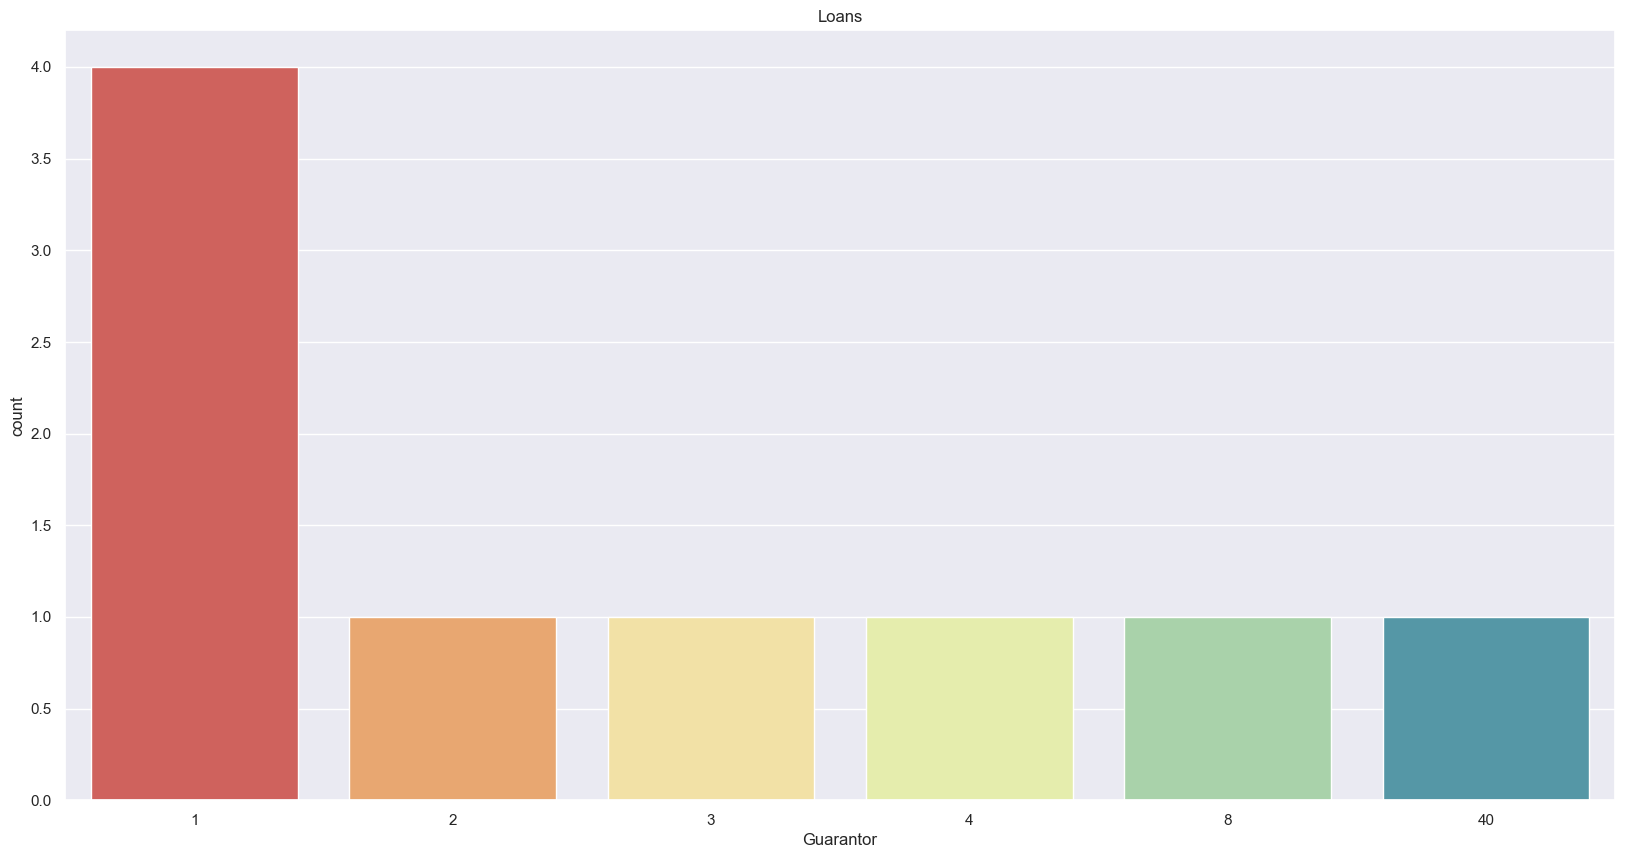

In [7]:
#Avisual representation of the top borrowers of the Kenyan Government and how many times they borrowed

sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Guarantor', data=Kenyan_loans, palette="Spectral")
plt.title('Loans')


In [8]:
Loan_status = df_loans[(df_loans.Guarantor == 'Kenya')]
Loan_status = Kenyan_loans.groupby('Loan Status').count().reset_index()
Loan_status  

,Loan Status,Borrower,End of Period,Loan Number,Region,Country Code,Country,Guarantor Country Code,Guarantor,Loan Type,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,1,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,8,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,40,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [9]:
#Getting Information of Organisations Grouping Them Together. 

df_loans.groupby('Borrower').sum()

,End of Period,Loan Number,Region,Country Code,Country,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
Borrower,,,,,,,,,,,,,,,,,,,,,
CHIEF ACCT KENYA POWER CO LTD,11/30/202211/30/202211/30/2022,IBRD17990IBRD22370IBRDS0120,EASTERN AND SOUTHERN AFRICAEASTERN AND SOUTHER...,KEKEKE,KenyaKenyaKenya,KEKEKE,KenyaKenyaKenya,NPLCPLNPL,Fully RepaidFully RepaidFully Cancelled,21.82,...,0.00,0.0,0.000000e+00,05/15/198508/01/198705/01/1982,11/15/199902/01/200011/01/1988,04/23/198009/22/198312/01/1978,01/22/198002/08/198310/31/1978,11/18/198004/27/198404/30/1979,12/31/198503/31/198606/30/1981,0
H. M. TREASURY,11/30/2022,IBRD02560,EASTERN AND SOUTHERN AFRICA,KE,Kenya,GB,United Kingdom,NPL,Fully Repaid,6.00,...,4305439.49,0.0,0.000000e+00,01/15/1964,07/15/1970,05/27/1960,05/24/1960,06/30/1960,04/30/1964,0
IND. DEVELOPMENT BANK LIMITED,11/30/202211/30/202211/30/202211/30/2022,IBRD09460IBRD11480IBRD14380IBRD18170,EASTERN AND SOUTHERN AFRICAEASTERN AND SOUTHER...,KEKEKEKE,KenyaKenyaKenyaKenya,KEKEKEKE,KenyaKenyaKenyaKenya,NPLNPLNPLNPL,Fully RepaidFully RepaidFully RepaidFully Repaid,32.20,...,0.00,0.0,0.000000e+00,07/15/197601/15/197808/01/198009/15/1983,07/15/199001/15/199302/01/199503/15/1998,11/29/197307/25/197506/22/197706/16/1980,11/20/197307/08/197505/31/197703/25/1980,03/26/197410/09/197511/10/197708/21/1980,09/30/197906/30/198012/31/198206/30/1988,09/13/1988
KENGEN,11/30/202211/30/2022,IBRD07450IBRD11470,EASTERN AND SOUTHERN AFRICAEASTERN AND SOUTHER...,KEKE,KenyaKenya,KEKE,KenyaKenya,NPLNPL,Fully RepaidFully Repaid,15.75,...,100000.00,0.0,0.000000e+00,07/01/197510/15/1979,07/01/199604/15/2000,06/07/197107/25/1975,06/01/197107/01/1975,12/23/197101/29/1976,12/31/197506/30/1980,0
KENYA ELECTRICITY GENERATING COMPANY LMT,11/30/2022,IBRD23590,EASTERN AND SOUTHERN AFRICA,KE,Kenya,KE,Kenya,CPL,Fully Repaid,4.59,...,0.00,0.0,0.000000e+00,07/15/1989,01/15/2004,06/28/1984,12/06/1983,09/13/1984,06/30/1992,08/14/1992
KENYA PIPELINE COMPANY LIMITED,11/30/2022,IBRD11330,EASTERN AND SOUTHERN AFRICA,KE,Kenya,KE,Kenya,NPL,Fully Repaid,8.50,...,0.00,0.0,0.000000e+00,07/01/1979,01/01/1995,06/27/1975,06/19/1975,12/03/1975,12/31/1980,0
KENYA POSTS & TELECOM. CORP.,11/30/2022,IBRD25740,EASTERN AND SOUTHERN AFRICA,KE,Kenya,KE,Kenya,CPL,Fully Repaid,4.31,...,0.00,0.0,0.000000e+00,02/01/1991,08/01/2005,05/23/1986,06/06/1985,08/14/1987,12/31/1989,06/15/1990
KENYA TEA DEVELOPMENT AUTHORIT,11/30/2022,IBRD09930,EASTERN AND SOUTHERN AFRICA,KE,Kenya,KE,Kenya,NPL,Fully Repaid,7.25,...,0.00,0.0,0.000000e+00,09/01/1981,03/01/1994,06/05/1974,05/14/1974,09/23/1974,06/30/1981,0
MR. MARTIN LUKE ODUOR-OTIENO,11/30/202211/30/202211/30/202211/30/202211/30/...,IBRD04283IBRD04287IBRD04831IBRD06381IBRD06741I...,EASTERN AND SOUTHERN AFRICAEASTERN AND SOUTHER...,KEKEKEKEKEKEKEKE,KenyaKenyaKenyaKenyaKenyaKenyaKenyaKenya,KEKEKEKEKEKEKEKE,KenyaKenyaKenyaKenyaKenyaKenyaKenyaKenya,NPLNPLNPLNPLNPLNPLNPLNPL,Fully RepaidFully RepaidFully RepaidFully Repa...,52.00,...,0.00,0.0,0.000000e+00,08/01/198508/01/198503/15/198506/15/198506/15/...,08/01/199508/01/199509/15/199106/15/199406/15/...,09/29/196509/29/196502/17/196708/25/196905/25/...,09/23/196509/23/196502/09/196707/29/196903/24/...,04/20/196604/20/196605/12/196712/16/196910/30/...,06/30/197106/30/197109/30/197312/31/197706/30/...,0


Text(0.5, 1.0, 'Loans')

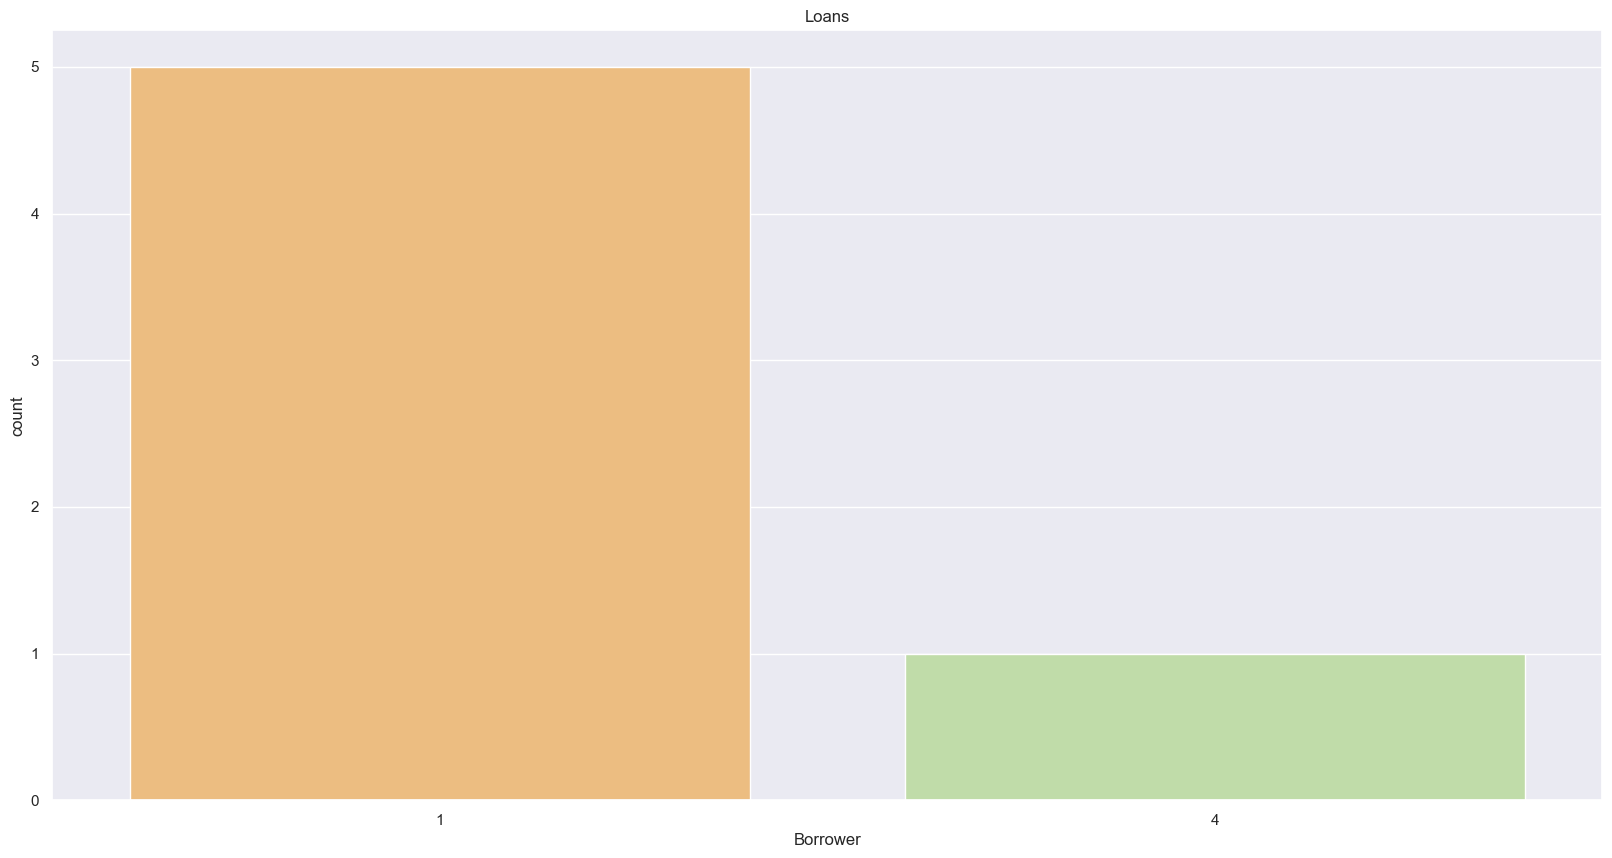

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Borrower', data=Loan_status, palette="Spectral")
plt.title('Loans')


In [11]:
#Analysing Credits Given To Organisations and Companies.

df_credits = pd.read_csv("FundsData/Credits_Kenya.csv")
df_credits

,End of Period,Credit Number,Region,Country Code,Country,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project ID,...,Repaid 3rd Party,Due 3rd Party,Credits Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,11/30/2022,IDA00640,EASTERN AND SOUTHERN AFRICA,KE,Kenya,The National Treasury and Planning,Fully Repaid,0.75,USD,P001220,...,0.0,0.0,0.00,06/01/1974,12/01/2013,08/17/1964,07/21/1964,09/23/1964,09/01/1972,NaN
1,11/30/2022,IDA00700,EASTERN AND SOUTHERN AFRICA,KE,Kenya,The National Treasury and Planning,Repaying,0.75,USD,P001221,...,0.0,0.0,0.00,03/01/1975,09/01/2014,12/29/1964,12/08/1964,03/30/1965,03/31/1969,NaN
2,11/30/2022,IDA00770,EASTERN AND SOUTHERN AFRICA,KE,Kenya,The National Treasury and Planning,Fully Repaid,0.75,USD,P001222,...,0.0,0.0,0.00,08/01/1975,02/01/2015,06/30/1965,06/22/1965,09/16/1965,03/31/1970,NaN
3,11/30/2022,IDA00930,EASTERN AND SOUTHERN AFRICA,KE,Kenya,The National Treasury and Planning,Repaying,0.75,USD,P001224,...,0.0,0.0,0.00,08/15/1976,02/15/2016,08/19/1966,08/18/1966,10/03/1966,12/31/1970,NaN
4,11/30/2022,IDA01040,EASTERN AND SOUTHERN AFRICA,KE,Kenya,The National Treasury and Planning,Fully Repaid,0.75,USD,P001225,...,0.0,0.0,0.00,09/01/1977,03/01/2017,05/11/1967,05/09/1967,06/19/1967,12/31/1971,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,11/30/2022,IDAH0500,EASTERN AND SOUTHERN AFRICA,KE,Kenya,The National Treasury and Planning,Fully Disbursed,NaN,XDR,P082378,...,0.0,0.0,0.00,NaN,NaN,06/26/2003,06/19/2003,07/18/2003,06/30/2007,02/05/2008
212,11/30/2022,IDAH0650,EASTERN AND SOUTHERN AFRICA,KE,Kenya,The National Treasury and Planning,Fully Disbursed,NaN,XDR,P078209,...,0.0,0.0,0.00,NaN,NaN,11/10/2003,10/17/2003,02/02/2004,12/31/2011,07/11/2012
213,11/30/2022,IDAH0980,EASTERN AND SOUTHERN AFRICA,KE,Kenya,The National Treasury and Planning,Fully Disbursed,NaN,XDR,P082396,...,0.0,0.0,0.00,NaN,NaN,06/25/2004,06/17/2004,10/21/2004,12/31/2008,06/10/2009
214,11/30/2022,IDAH1000,EASTERN AND SOUTHERN AFRICA,KE,Kenya,The National Treasury and Planning,Fully Disbursed,NaN,XDR,P049618,...,0.0,0.0,0.00,NaN,NaN,06/25/2004,06/17/2004,09/22/2004,12/31/2007,05/29/2008


In [12]:
#Credits Information

df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   End of Period                 216 non-null    object 
 1   Credit Number                 216 non-null    object 
 2   Region                        216 non-null    object 
 3   Country Code                  216 non-null    object 
 4   Country                       216 non-null    object 
 5   Borrower                      216 non-null    object 
 6   Credit Status                 216 non-null    object 
 7   Service Charge Rate           202 non-null    float64
 8   Currency of Commitment        216 non-null    object 
 9   Project ID                    216 non-null    object 
 10  Project Name                  216 non-null    object 
 11  Original Principal Amount     216 non-null    float64
 12  Cancelled Amount              216 non-null    float64
 13  Undis

In [13]:
#Credits Information

df_credits.describe()

,Service Charge Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IDA,Due to IDA,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Credits Held
count,202.000000,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,216.0,2.160000e+02,216.0,216.0,216.0,2.160000e+02
mean,0.862574,8.531797e+07,6.919017e+06,1.604930e+07,6.124802e+07,1.085247e+07,4.740954e+07,0.0,4.740954e+07,0.0,0.0,0.0,6.345884e+07
std,0.395842,1.270232e+08,2.319309e+07,5.512806e+07,1.104523e+08,1.738615e+07,1.073867e+08,0.0,1.073867e+08,0.0,0.0,0.0,1.212234e+08
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e-02,0.0,-1.000000e-02,0.0,0.0,0.0,-1.000000e-02
25%,0.750000,1.712500e+07,0.000000e+00,0.000000e+00,8.183835e+06,1.026221e+05,8.325345e+05,0.0,8.325345e+05,0.0,0.0,0.0,3.009856e+06
50%,0.750000,4.159500e+07,6.430442e+04,0.000000e+00,2.659965e+07,4.282592e+06,1.062523e+07,0.0,1.062523e+07,0.0,0.0,0.0,1.842205e+07
75%,0.750000,1.000000e+08,3.435525e+06,0.000000e+00,6.032971e+07,1.352733e+07,3.998882e+07,0.0,3.998882e+07,0.0,0.0,0.0,6.127722e+07
max,3.090000,7.500000e+08,2.330898e+08,6.271524e+08,7.511305e+08,1.241354e+08,7.500000e+08,0.0,7.500000e+08,0.0,0.0,0.0,7.500000e+08


In [14]:
df_credits.isnull().sum()

End of Period                    0
Credit Number                    0
Region                           0
Country Code                     0
Country                          0
Borrower                         0
Credit Status                    0
Service Charge Rate             14
Currency of Commitment           0
Project ID                       0
Project Name                     0
Original Principal Amount        0
Cancelled Amount                 0
Undisbursed Amount               0
Disbursed Amount                 0
Repaid to IDA                    0
Due to IDA                       0
Exchange Adjustment              0
Borrower's Obligation            0
Sold 3rd Party                   0
Repaid 3rd Party                 0
Due 3rd Party                    0
Credits Held                     0
First Repayment Date            13
Last Repayment Date             13
Agreement Signing Date           2
Board Approval Date              0
Effective Date (Most Recent)     2
Closed Date (Most Re

In [15]:
#Grouping Credits In Terms of Credits Borrowers

df_credits.groupby('Borrower').sum()

,End of Period,Credit Number,Region,Country Code,Country,Credit Status,Service Charge Rate,Currency of Commitment,Project ID,Project Name,...,Repaid 3rd Party,Due 3rd Party,Credits Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
Borrower,,,,,,,,,,,,,,,,,,,,,
Gulf Power Limited,11/30/202211/30/2022,IDAG2180IDAG2190,EASTERN AND SOUTHERN AFRICAEASTERN AND SOUTHER...,KEKE,KenyaKenya,EffectiveEffective,0.00,EURUSD,P122671P122671,Private Sector Power Generation ProjectPrivate...,...,0.0,0.0,4.225130e+07,0,0,03/14/201303/14/2013,05/24/201205/24/2012,05/27/201305/27/2013,12/31/201612/31/2016,0
KENYA ELECTRICITY GENERATING COMPANY LMT,11/30/2022,IDAG2560,EASTERN AND SOUTHERN AFRICA,KE,Kenya,Terminated,0.00,USD,P162422,KenGen Guarantee Project,...,0.0,0.0,0.000000e+00,0,0,0,04/26/2018,0,10/30/2022,0
Kenya Power and Lighting Company,11/30/2022,IDAG2330,EASTERN AND SOUTHERN AFRICA,KE,Kenya,Effective,0.00,USD,P145104,Kenya Electricity Modernization Project,...,0.0,0.0,1.150000e+08,0,0,06/02/2016,03/31/2015,06/15/2016,12/31/2022,0
The National Treasury and Planning,11/30/202211/30/202211/30/202211/30/202211/30/...,IDA00640IDA00700IDA00770IDA00930IDA01040IDA010...,EASTERN AND SOUTHERN AFRICAEASTERN AND SOUTHER...,KEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKE...,KenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaK...,Fully RepaidRepayingFully RepaidRepayingFully ...,174.24,USDUSDUSDUSDUSDUSDUSDUSDUSDUSDUSDUSDUSDUSDUSDU...,P001220P001221P001222P001224P001225P001223P001...,KTDA TEA DEVELOPMENTHIGHWAYS ITEA ROADSEDUCATI...,...,0.0,0.0,1.346188e+10,06/01/197403/01/197508/01/197508/15/197609/01/...,12/01/201309/01/201402/01/201502/15/201603/01/...,08/17/196412/29/196406/30/196508/19/196605/11/...,07/21/196412/08/196406/22/196508/18/196605/09/...,09/23/196403/30/196509/16/196510/03/196606/19/...,09/01/197203/31/196903/31/197012/31/197012/31/...,07/31/198706/22/198705/14/199206/19/199104/02/...
Thika Power Limited,11/30/202211/30/2022,IDAG2110IDAG2120,EASTERN AND SOUTHERN AFRICAEASTERN AND SOUTHER...,KEKE,KenyaKenya,EffectiveEffective,0.00,USDEUR,P122671P122671,Private Sector Power Generation ProjectPrivate...,...,0.0,0.0,4.297643e+07,0,0,08/28/201208/28/2012,05/24/201205/24/2012,10/08/201210/08/2012,12/31/201612/31/2016,0
Triumph Power Generating Company,11/30/2022,IDAG2150,EASTERN AND SOUTHERN AFRICA,KE,Kenya,Effective,0.00,USD,P122671,Private Sector Power Generation Project,...,0.0,0.0,4.500000e+07,0,0,12/05/2012,05/24/2012,03/27/2013,12/31/2016,0


In [16]:
#Analysing Investments made in The Kenyan

df_investments = pd.read_csv("FundsData/Investment_Projects_Kenya.csv")
df_investments

,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date
0,11/10/2022,WCS COVID DTB II,Summary of Investment Information (AIP Policy ...,46966,Loan,DIAMOND TRUST BANK KENYA LIMITED,Kenya,KEN,Financial Institutions,FI-2,Regional Industry - FIG Africa,Active,09/30/2022,NaN,NaN,100.00,NaN,100.00,KE,"January 06, 2023 03:19 AM"
1,10/21/2022,Avenue II,Summary of Investment Information (AIP Policy ...,46557,NaN,THE AVENUE GROUP,Kenya,KEN,Health and Education,B,Regional Industry - MAS Africa,Pending,12/09/2022,NaN,NaN,NaN,NaN,NaN,KE,"January 06, 2023 03:19 AM"
2,08/31/2022,KCB Senior Loan,Summary of Investment Information (AIP Policy ...,46587,Loan,KCB BANK KENYA LIMITED,Kenya,KEN,Financial Institutions,FI-2,Regional Industry - FIG Africa,Active,06/29/2022,NaN,NaN,150.00,NaN,150.00,KE,"January 06, 2023 03:19 AM"
3,05/11/2022,Project Autumn,Summary of Investment Information (AIP Policy ...,46166,Equity,EQUITY GROUP HOLDINGS PLC,Kenya,KEN,Financial Institutions,FI-1,Regional Industry - FIG Africa,Active,12/21/2021,NaN,NaN,NaN,84.05,84.05,KE,"January 06, 2023 03:19 AM"
4,03/10/2022,DCM KMRC,Summary of Investment Information (AIP Policy ...,45936,Loan,KENYA MORTGAGE REFINANCE COMPANY,Kenya,KEN,Financial Institutions,FI-3,Regional Industry - FIG Africa,Active,02/17/2022,NaN,NaN,36.97,NaN,36.97,KE,"January 06, 2023 03:19 AM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,04/23/1996,AEF Equitea EPZ Company Limited,Summary of Proposed Investment (Disclosure Pol...,7366,Loan,Equitea EPZ Company Ltd.,Kenya,KEN,Agribusiness and Forestry,B,Regional Industry - MAS Africa,Completed,NaN,NaN,NaN,0.31,0.12,0.43,KE,"January 06, 2023 03:19 AM"
106,12/15/1995,Panafrican Paper Mills Ltd.,Summary of Proposed Investment (Disclosure Pol...,7206,Loan,Panafrican Airways Limited,Kenya,KEN,Agribusiness and Forestry,B,"Gbl Ind, Manufact, Agribus &amp; Services",Completed,NaN,NaN,NaN,15.00,NaN,15.00,KE,"January 06, 2023 03:19 AM"
107,09/07/1995,AEF K-Rep Bank Limited,Summary of Proposed Investment (Disclosure Pol...,7017,Equity,K-REP BANK LIMITED,Kenya,KEN,Financial Institutions,C,"Global Industry, Financial Markets",Completed,NaN,NaN,NaN,NaN,1.00,1.00,KE,"January 06, 2023 03:19 AM"
108,06/05/1995,AEF Bawan Roses (formerly Island Farm),Summary of Proposed Investment (Disclosure Pol...,5142,Loan,Bawan Roses Limited,Kenya,KEN,Agribusiness and Forestry,B,Regional Industry - MAS Africa,Completed,NaN,NaN,NaN,0.50,NaN,0.50,KE,"January 06, 2023 03:19 AM"


In [17]:
df_investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Date Disclosed                                            110 non-null    object 
 1   Project Name                                              110 non-null    object 
 2   Document Type                                             110 non-null    object 
 3   Project Number                                            110 non-null    int64  
 4   Product Line                                              106 non-null    object 
 5   Company Name                                              110 non-null    object 
 6   Country                                                   110 non-null    object 
 7   IFC Country Code                                          110 non-null    object 
 8   Industry            

In [18]:
df_investments.describe()

,Project Number,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD)
count,110.000000,0.0,6.000000,85.000000,31.000000,106.000000
mean,38306.354545,NaN,6.021667,32.262353,25.144516,33.565283
std,65208.854518,NaN,2.905336,40.058261,47.940547,46.463793
min,4853.000000,NaN,1.640000,0.000000,0.000000,0.340000
25%,23872.750000,NaN,4.692500,5.000000,1.405000,5.000000
50%,32887.500000,NaN,6.200000,15.000000,8.200000,15.000000
75%,41788.250000,NaN,7.475000,50.000000,27.500000,45.150000
max,505373.000000,NaN,10.000000,200.000000,250.000000,250.000000


In [19]:
df_investments.isnull().sum()

Date Disclosed                                                0
Project Name                                                  0
Document Type                                                 0
Project Number                                                0
Product Line                                                  4
Company Name                                                  0
Country                                                       0
IFC Country Code                                              0
Industry                                                      0
Environmental Category                                        0
Department                                                    0
Status                                                        0
Projected Board Date                                         25
IFC investment for Risk Management(Million - USD)           110
IFC investment for Guarantee(Million - USD)                 104
IFC investment for Loan(Million - USD)  

In [20]:
#Querying The Description of The Active Investments That took Place 

df_investments.query('Status == "Active"').describe()

,Project Number,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD)
count,42.000000,0.0,1.0,28.000000,20.000000,42.000000
mean,40000.214286,NaN,7.5,46.042143,30.671500,45.479048
std,5135.833651,NaN,NaN,44.996395,55.404804,52.034487
min,25786.000000,NaN,7.5,0.000000,1.310000,1.500000
25%,36476.250000,NaN,7.5,13.355000,4.995000,10.625000
50%,41346.500000,NaN,7.5,27.500000,15.000000,27.750000
75%,43895.750000,NaN,7.5,63.750000,30.000000,57.500000
max,46966.000000,NaN,7.5,150.000000,250.000000,250.000000


In [21]:
#What Industry was highly Invested In 

top_invested_industry = df_investments.Industry.value_counts().sort_values(ascending=False).head(10)
top_invested_industry


Industry
Financial Institutions                       41
Agribusiness and Forestry                    17
Health and Education                         14
Infrastructure                               11
Manufacturing                                 9
Tourism, Retail, and Property                 7
Funds                                         4
other                                         4
Telecommunications, Media, and Technology     2
Oil, Gas, and Mining                          1
Name: count, dtype: int64

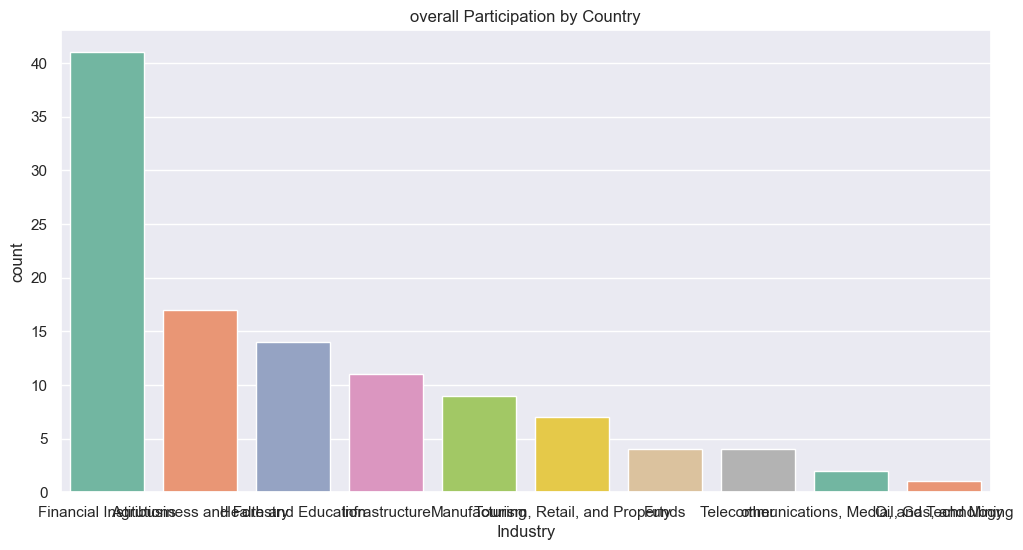

In [22]:
#Plot for the top invested industries in the country

plt.figure(figsize=(12,6))
#plt.xticks(rotation=20)
plt.title('overall Participation by Country')
sns.barplot(x=top_invested_industry.index, y=top_invested_industry, palette='Set2');



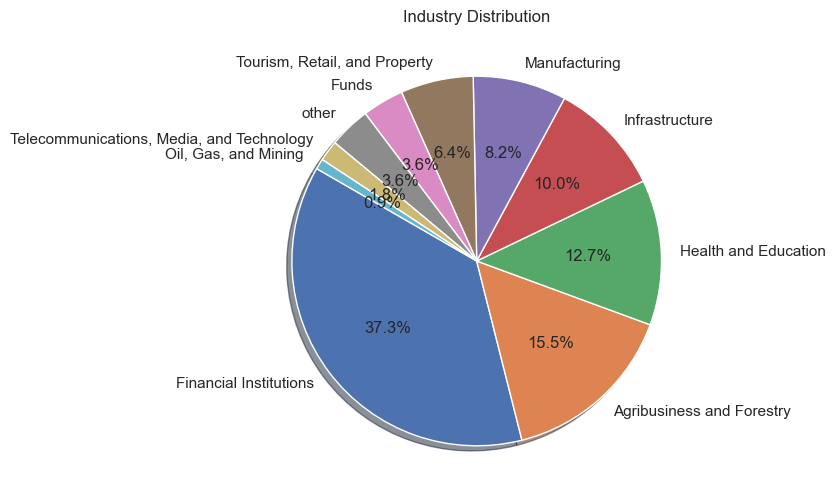

In [23]:
plt.figure(figsize=(12,6))
plt.title('Industry Distribution')
plt.pie(top_invested_industry, labels=top_invested_industry.index, autopct='%1.1f%%', startangle=150, shadow=True);


In [24]:
#State of Various Institutions of Investments

status_invested_industry = df_investments.Status.value_counts().sort_values(ascending=False).head(10)
status_invested_industry

Status
Completed           63
Active              42
Pending              4
Pending Approval     1
Name: count, dtype: int64

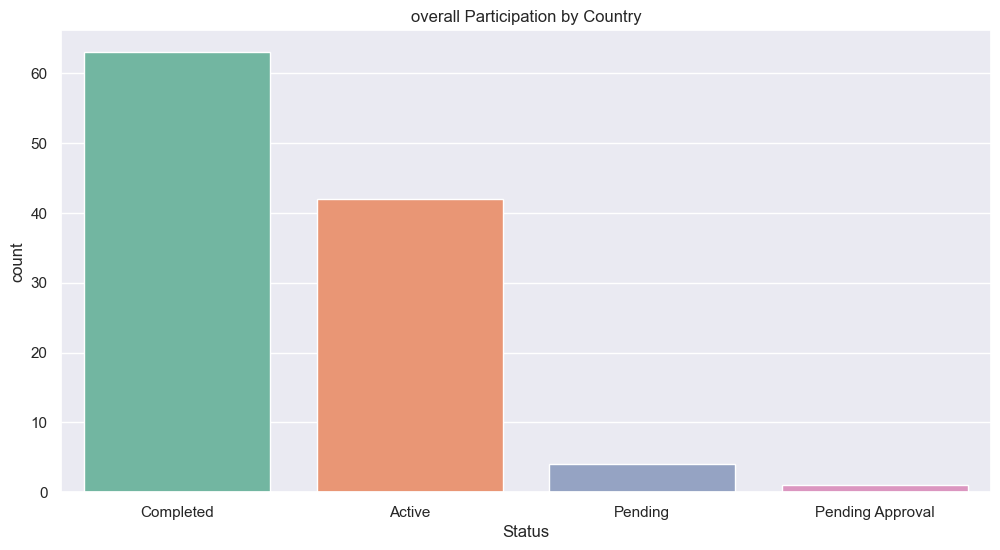

In [25]:
#Plot for the top invested industies in the country

plt.figure(figsize=(12,6))
#plt.xticks(rotation=20)
plt.title('overall Participation by Country')
sns.barplot(x=status_invested_industry.index, y=status_invested_industry, palette='Set2');



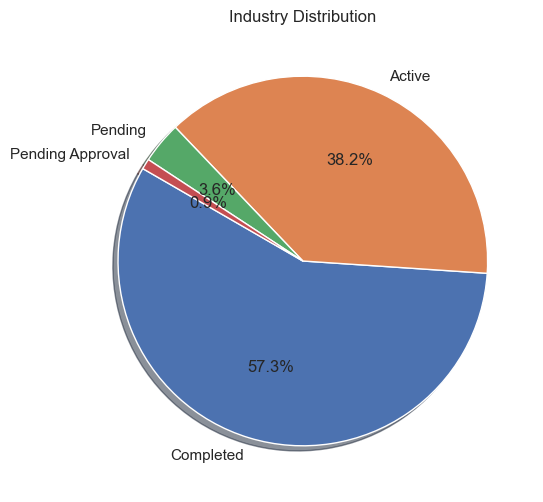

In [26]:
plt.figure(figsize=(12,6))
plt.title('Industry Distribution')
plt.pie(status_invested_industry, labels=status_invested_industry
.index, autopct='%1.1f%%', startangle=150, shadow=True);


In [27]:
#Using Group By() show the Type Of Industry and the type of status of the Investment. 

df_industry=df_investments.groupby(["Industry","Status"])
df_industry.describe()

Project Number  \
                                                                    count   
Industry                                  Status                            
Agribusiness and Forestry                 Active                      4.0   
                                          Completed                  13.0   
Financial Institutions                    Active                     18.0   
                                          Completed                  23.0   
Funds                                     Active                      4.0   
Health and Education                      Active                      2.0   
                                          Completed                  10.0   
                                          Pending                     2.0   
Infrastructure                            Active                      3.0   
                                          Completed                   7.0   
                                          Pending Approval            1.0   
Manufacturing                             Active                      3.0   
                                          Completed                   4.0   
                                          Pending                     2.0   
Oil, Gas, and Mining                      Active                      1.0   
Telecommunications, Media, and Technology Active                      2.0   
Tourism, Retail, and Property             Active                      4.0   
                                          Completed                   3.0   
other                                     Active                      1.0   
                                          Completed                   3.0   

                                                                           \
                                                                     mean   
Industry                                  Status                            
Agribusiness and Forestry                 Active             39796.500000   
                                          Completed          13742.615385   
Financial Institutions                    Active             41154.444444   
                                          Completed          28795.695652   
Funds                                     Active             43533.000000   
Health and Education                      Active             36678.500000   
                                          Completed          26649.200000   
                                          Pending            43230.500000   
Infrastructure                            Active             32617.666667   
                                          Completed          89307.000000   
                                          Pending Approval  505373.000000   
Manufacturing                             Active             38795.333333   
                                          Completed           8267.500000   
                                          Pending            44043.000000   
Oil, Gas, and Mining                      Active             36699.000000   
Telecommunications, Media, and Technology Active             42745.500000   
Tourism, Retail, and Property             Active             37780.750000   
                                          Completed          19623.000000   
other                                     Active             45002.000000   
                                          Completed           9745.000000   

                                                                           \
                                                                      std   
Industry                                  Status                            
Agribusiness and Forestry                 Active              4356.002334   
                                          Completed          10709.301934   
Financial Institutions                    Active              5599.494160   
                                          Completed  

ValueError: x and y must be the same size

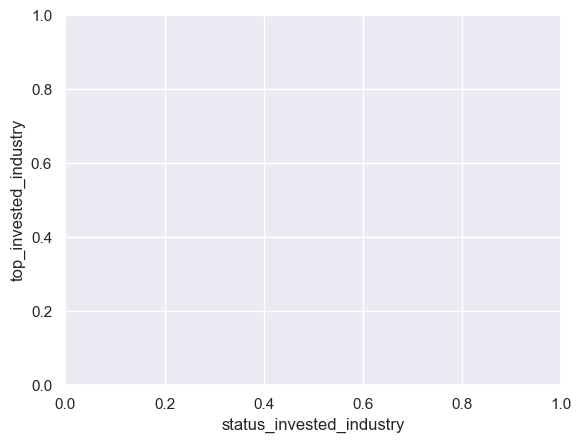

In [28]:
plt.xlabel('status_invested_industry')
plt.ylabel('top_invested_industry')
plt.scatter(status_invested_industry,top_invested_industry)